In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

In [119]:
import warnings
warnings.filterwarnings("ignore")

In [120]:
file = open("cleaned_processed.cleveland.data",'r')
num_lines = file.readlines()
list_of_data = []
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','label']

for item in num_lines:
    list_of_data.append(item.rstrip("\n").split(","))

df = pd.DataFrame(list_of_data,columns=cols)

features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

X = df[features]
y = df.label

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [121]:
## This is unpruned decision tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

def before_pruning(split_criterion):
    clf = DecisionTreeClassifier(criterion=split_criterion)
    clf = clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print("\tTrain accuracy:",accuracy_score(y_train,y_train_pred),"\n\tTest accuracy:",round(accuracy_score(y_test,y_pred_test),2))
    return clf

## Minimal Cost Complexity Pruning 
def after_pruning(split_criterion,clf):
    pruned_path = clf.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
    accuracy_train,accuracy_test = [],[]
    for alpha in pruned_path:
        pruned_temp = DecisionTreeClassifier(ccp_alpha=alpha,criterion=split_criterion)
        pruned_temp.fit(X_train,y_train)

        accuracy_train.append(pruned_temp.score(X_train, y_train))
        Prediction = pruned_temp.predict(X_test)
        accuracy_test.append(pruned_temp.score(X_test, y_test))


    print("\tTraining Accuracy:")
    print("\t\tMinimum:", min(accuracy_train),"\n\t\tMaximum:", max(accuracy_train),"\n\t\tMean:", (sum(accuracy_train)/(len(accuracy_train))))
    print("\n\tTesting Accuracy:")
    print("\t\tMinimum:", min(accuracy_test),"\n\t\tMaximum:", max(accuracy_test),"\n\t\tMean:", (sum(accuracy_test)/(len(accuracy_test))))
    plt.title("Cost-Complexity Pruning \nCriterion: " + split_criterion.title())
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.plot(pruned_path,accuracy_train)   
    plt.plot(pruned_path,accuracy_test) 
    plt.legend(["Train","Test"])

    return accuracy_train,accuracy_test,pruned_path

In [122]:
## Random Forests
from sklearn.ensemble import RandomForestClassifier

def forest_accuracy(num_trees,train_dict,test_dict,split_criterion,accuracy_train,accuracy_test):
    forest = RandomForestClassifier(n_estimators=num_trees,criterion=split_criterion)
    forest.fit(X_train,y_train)

    train_dict[num_trees] = forest.score(X_train,y_train)
    test_dict[num_trees] = forest.score(X_test,y_test)

    accuracy_train.append(forest.score(X_train,y_train))
    accuracy_test.append(forest.score(X_test,y_test))

def plot_data(split_criterion,train_dict,test_dict):
    accuracy_train,accuracy_test=[],[]
    for i in range(0,1001,50):
        if i>0:
            forest_accuracy(i,train_dict,test_dict,split_criterion,accuracy_train,accuracy_test)
        else:
            continue

    train_x_axis = train_dict.keys()
    train_y_axis = train_dict.values()
    test_y_axis = test_dict.values()

    print("\tTraining Accuracy:")
    print("\t\tMinimum:", min(accuracy_train),"\n\t\tMaximum:", max(accuracy_train),"\n\t\tMean:", (sum(accuracy_train)/(len(accuracy_train))))
    print("\n\tTesting Accuracy:")
    print("\t\tMinimum:", min(accuracy_test),"\n\t\tMaximum:", max(accuracy_test),"\n\t\tMean:", (sum(accuracy_test)/(len(accuracy_test))))

    plt.title("Random Forest with variable number of trees\nSplit Criterion: " + split_criterion)
    plt.xlabel("Number of Trees")
    plt.ylabel("Accuracy")
    plt.plot(train_x_axis,list(train_y_axis))   
    plt.plot(train_x_axis,list(test_y_axis))
    plt.legend(["Train","Test"])



In [123]:
## Neural Network before standardization of data
from sklearn.neural_network import MLPClassifier

loss_curves = {}

def neural_net(hidden_size,net_train,net_test):
    net = MLPClassifier(hidden_layer_sizes=hidden_size,max_iter=2000,alpha=0.01,solver='adam',learning_rate_init=0.001,learning_rate="adaptive")
    net.fit(X_train,y_train)

    net_train[hidden_size[0]] = net.score(X_train,y_train)
    net_test[hidden_size[0]] = net.score(X_test,y_test)

    loss_curves[hidden_size[0]] = net.loss_curve_
    
def plot_net_data(hidden_layer_size,net_train,net_test):
    neural_net((hidden_layer_size,),net_train,net_test)

## TESTING

### 1. Decision Trees: Changing Split Criterions

Before Pruning: Entropy
	Train accuracy: 1.0 
	Test accuracy: 0.72
After Pruning: Entropy
	Training Accuracy:
		Minimum: 0.5485232067510548 
		Maximum: 1.0 
		Mean: 0.8765822784810124

	Testing Accuracy:
		Minimum: 0.5 
		Maximum: 0.8166666666666667 
		Mean: 0.7546875000000002


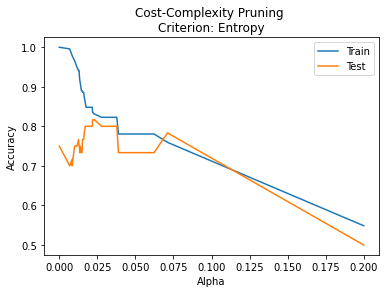

In [124]:
print("Before Pruning: Entropy")
clf = before_pruning("entropy")
print("After Pruning: Entropy")
train,test,path = after_pruning("entropy",clf)

Before Pruning: Gini
	Train accuracy: 1.0 
	Test accuracy: 0.77
After Pruning: Gini
	Training Accuracy:
		Minimum: 0.5485232067510548 
		Maximum: 1.0 
		Mean: 0.8942334739803096

	Testing Accuracy:
		Minimum: 0.5 
		Maximum: 0.8333333333333334 
		Mean: 0.7788888888888891


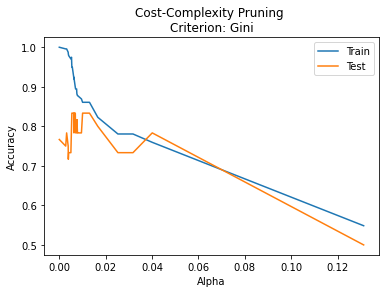

In [127]:
print("Before Pruning: Gini")
clf2 = before_pruning("gini")
print("After Pruning: Gini")
train2,test2,path2 = after_pruning("gini",clf2)

### 2. Random Forests: Changing Number of Trees in Forest

	Training Accuracy:
		Minimum: 1.0 
		Maximum: 1.0 
		Mean: 1.0

	Testing Accuracy:
		Minimum: 0.85 
		Maximum: 0.8833333333333333 
		Mean: 0.8641666666666667


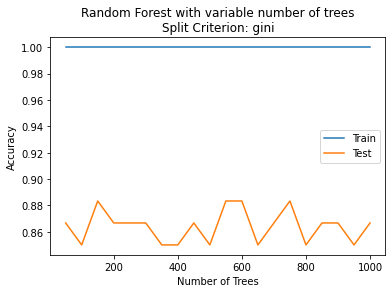

In [128]:
gini_train,gini_test = {},{}
plot_data("gini",gini_train,gini_test)

	Training Accuracy:
		Minimum: 1.0 
		Maximum: 1.0 
		Mean: 1.0

	Testing Accuracy:
		Minimum: 0.8333333333333334 
		Maximum: 0.8833333333333333 
		Mean: 0.8583333333333334


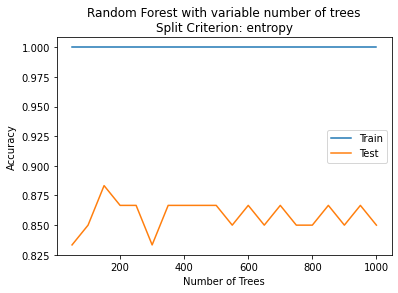

In [129]:
entropy_train,entropy_test = {},{}
plot_data("entropy",entropy_train,entropy_test)

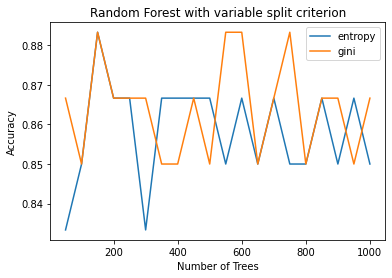

In [130]:
plt.title("Random Forest with variable split criterion")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(list(gini_test.keys()),list(entropy_test.values()))   
plt.plot(list(gini_test.keys()),list(gini_test.values()))
plt.legend(["entropy","gini"])

### 3.1 Neural Network: Changing Hidden Layer Size

#### 3.1.1 Using SGD

Training Accuracy: 0.8607594936708861
Accuracy of using 3 neurons in the hidden layer:0.7833

Training Accuracy: 0.9324894514767933
Accuracy of using 7 neurons in the hidden layer:0.8000

Training Accuracy: 0.9915611814345991
Accuracy of using 13 neurons in the hidden layer:0.8333

Training Accuracy: 0.9957805907172996
Accuracy of using 21 neurons in the hidden layer:0.8167


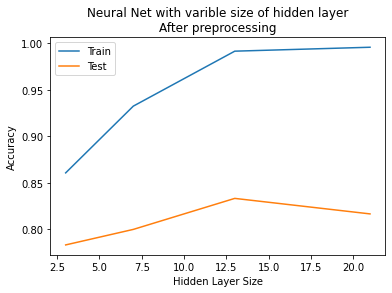

In [131]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
trainData,testData,trainLabel,testLabel = train_test_split(X_scaled,y,test_size=0.2)

net_train, net_test = [],[]
keys = [3,7,13,21]

clf_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20000, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
train = clf_1.score(trainData,trainLabel)
test = clf_1.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("Training Accuracy:", train)
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%test)

clf_2 = MLPClassifier(hidden_layer_sizes=(7), max_iter=20000, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
train = clf_2.score(trainData,trainLabel)
test = clf_2.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%test)


clf_3 = MLPClassifier(hidden_layer_sizes=(13), max_iter=20000, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
train = clf_3.score(trainData,trainLabel)
test = clf_3.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%test)

clf_4 = MLPClassifier(hidden_layer_sizes=(21), max_iter=20000, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
train = clf_4.score(trainData,trainLabel)
test = clf_4.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%test)

plt.title("Neural Net with varible size of hidden layer\nAfter preprocessing")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.plot(keys,net_train)   
plt.plot(keys,net_test)
plt.legend(["Train","Test"])

#### 3.1.2 Using Adam

Training Accuracy: 0.9029535864978903
Accuracy of using 3 neurons in the hidden layer:0.7667

Training Accuracy: 0.9789029535864979
Accuracy of using 7 neurons in the hidden layer:0.7500

Training Accuracy: 1.0
Accuracy of using 13 neurons in the hidden layer:0.8667

Training Accuracy: 1.0
Accuracy of using 21 neurons in the hidden layer:0.8333


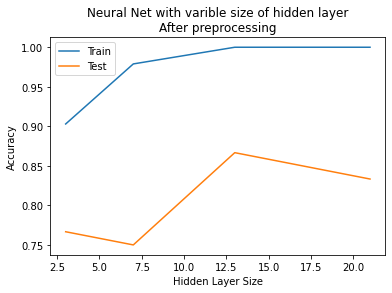

In [132]:
net_train, net_test = [],[]
keys = [3,7,13,21]

clf_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
train = clf_1.score(trainData,trainLabel)
test = clf_1.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("Training Accuracy:", train)
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%test)

clf_2 = MLPClassifier(hidden_layer_sizes=(7), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
train = clf_2.score(trainData,trainLabel)
test = clf_2.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%test)


clf_3 = MLPClassifier(hidden_layer_sizes=(13), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
train = clf_3.score(trainData,trainLabel)
test = clf_3.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%test)

clf_4 = MLPClassifier(hidden_layer_sizes=(21), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
train = clf_4.score(trainData,trainLabel)
test = clf_4.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%test)

plt.title("Neural Net with varible size of hidden layer\nAfter preprocessing")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.plot(keys,net_train)   
plt.plot(keys,net_test)
plt.legend(["Train","Test"])

### 3.2 Neural Network Changing Alpha

#### 3.2.1 Using SGD

Training Accuracy: 0.9535864978902954
Accuracy using sing alpha=0.001: 0.7833

Training Accuracy: 0.9746835443037974
Accuracy using alpha=0.01: 0.7333

Training Accuracy: 0.9704641350210971
Accuracy using alpha=0.1: 0.7500

Training Accuracy: 0.8776371308016878
Accuracy using alpha=1: 0.8000


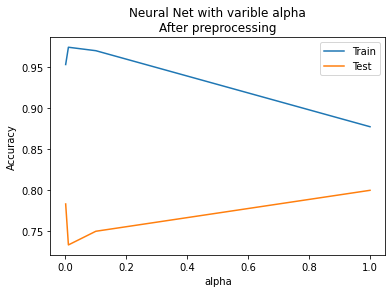

In [134]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
trainData,testData,trainLabel,testLabel = train_test_split(X_scaled,y,test_size=0.2)

net_train, net_test = [],[]
keys = [0.001,0.01,0.1,1]

clf_5 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.001,solver='sgd', learning_rate_init=.01)
clf_5.fit(trainData,trainLabel)
train = clf_5.score(trainData,trainLabel)
test = clf_5.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("Training Accuracy:", train)
print("Accuracy using sing alpha=0.001: %.4f"%test)

clf_6 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.01,solver='sgd', learning_rate_init=.01)
clf_6.fit(trainData,trainLabel)
train = clf_6.score(trainData,trainLabel)
test = clf_6.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=0.01: %.4f"%test)


clf_7 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.1,solver='sgd', learning_rate_init=.01)
clf_7.fit(trainData,trainLabel)
train = clf_7.score(trainData,trainLabel)
test = clf_7.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=0.1: %.4f"%test)

clf_8 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=1,solver='sgd', learning_rate_init=.01)
clf_8.fit(trainData,trainLabel)
train = clf_8.score(trainData,trainLabel)
test = clf_8.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=1: %.4f"%test)

plt.title("Neural Net with varible alpha\nAfter preprocessing")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.plot(keys,net_train)   
plt.plot(keys,net_test)
plt.legend(["Train","Test"])

#### 3.2.1 Using Adam

Training Accuracy: 0.9957805907172996
Accuracy using sing alpha=0.001: 0.7000

Training Accuracy: 0.9957805907172996
Accuracy using alpha=0.01: 0.7167

Training Accuracy: 0.9789029535864979
Accuracy using alpha=0.1: 0.7000

Training Accuracy: 0.8987341772151899
Accuracy using alpha=1: 0.8333


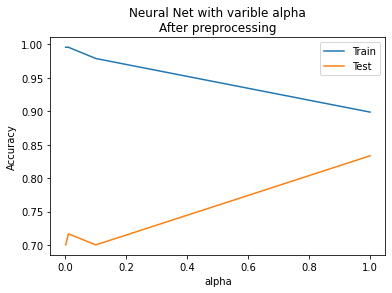

In [135]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
trainData,testData,trainLabel,testLabel = train_test_split(X_scaled,y,test_size=0.2)

net_train, net_test = [],[]
keys = [0.001,0.01,0.1,1]

clf_5 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.001,solver='adam', learning_rate_init=.01)
clf_5.fit(trainData,trainLabel)
train = clf_5.score(trainData,trainLabel)
test = clf_5.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("Training Accuracy:", train)
print("Accuracy using sing alpha=0.001: %.4f"%test)

clf_6 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.01,solver='adam', learning_rate_init=.01)
clf_6.fit(trainData,trainLabel)
train = clf_6.score(trainData,trainLabel)
test = clf_6.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=0.01: %.4f"%test)


clf_7 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=0.1,solver='adam', learning_rate_init=.01)
clf_7.fit(trainData,trainLabel)
train = clf_7.score(trainData,trainLabel)
test = clf_7.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=0.1: %.4f"%test)

clf_8 = MLPClassifier(hidden_layer_sizes=(10), max_iter=20000, alpha=1,solver='adam', learning_rate_init=.01)
clf_8.fit(trainData,trainLabel)
train = clf_8.score(trainData,trainLabel)
test = clf_8.score(testData,testLabel)
net_train.append(train)
net_test.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy using alpha=1: %.4f"%test)

plt.title("Neural Net with varible alpha\nAfter preprocessing")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.plot(keys,net_train)   
plt.plot(keys,net_test)
plt.legend(["Train","Test"])

### Changing Test Size

#### Decision Tree

	Train accuracy: 1.0 
	Test accuracy: 0.7
After Pruning: Gini
	Training Accuracy:
		Minimum: 0.527027027027027 
		Maximum: 1.0 
		Mean: 0.8981288981288981

	Testing Accuracy:
		Minimum: 0.5503355704697986 
		Maximum: 0.785234899328859 
		Mean: 0.7237996902426432
	Train accuracy: 1.0 
	Test accuracy: 0.71
After Pruning: Gini
	Training Accuracy:
		Minimum: 0.5714285714285714 
		Maximum: 1.0 
		Mean: 0.8333333333333334

	Testing Accuracy:
		Minimum: 0.4558303886925795 
		Maximum: 0.7455830388692579 
		Mean: 0.6360424028268552


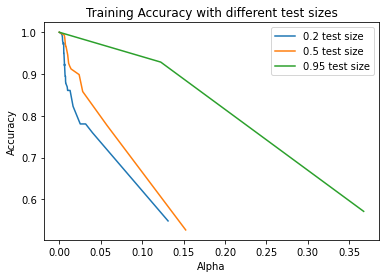

In [136]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=1)
clf3 = before_pruning("gini")
print("After Pruning: Gini")
train3,test3,path3 = after_pruning("gini",clf3)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.95, random_state=1)
clf4 = before_pruning("gini")
print("After Pruning: Gini")
train4,test4,path4 = after_pruning("gini",clf4)

plt.clf()
plt.title("Training Accuracy with different test sizes")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(path2,train2)  
plt.plot(path3,train3)   
plt.plot(path4,train4)   
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])


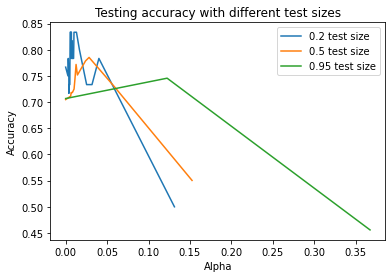

In [137]:
plt.clf()
plt.title("Testing accuracy with different test sizes")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(path2,test2)  
plt.plot(path3,test3)   
plt.plot(path4,test4)   
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])

	Training Accuracy:
		Minimum: 1.0 
		Maximum: 1.0 
		Mean: 1.0

	Testing Accuracy:
		Minimum: 0.8053691275167785 
		Maximum: 0.8389261744966443 
		Mean: 0.8224832214765101


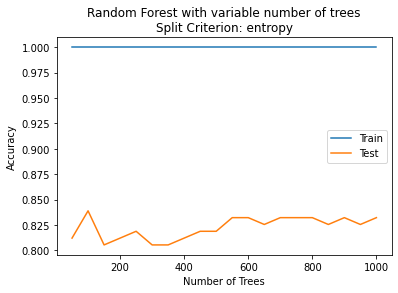

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=1)
entropy_train2,entropy_test2 = {},{}
plot_data("entropy",entropy_train2,entropy_test2)

	Training Accuracy:
		Minimum: 1.0 
		Maximum: 1.0 
		Mean: 1.0

	Testing Accuracy:
		Minimum: 0.7632508833922261 
		Maximum: 0.7915194346289752 
		Mean: 0.7840989399293288


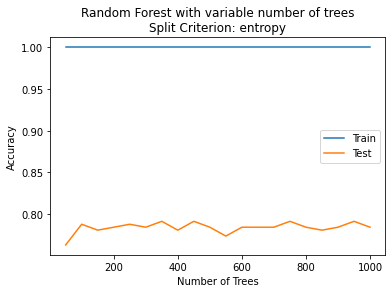

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.95, random_state=1)
entropy_train3,entropy_test3 = {},{}
plot_data("entropy",entropy_train3,entropy_test3)

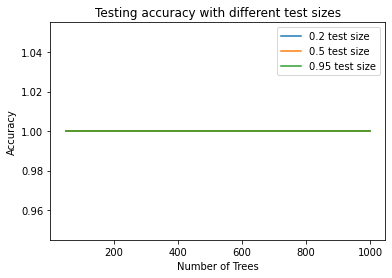

In [144]:
plt.clf()
plt.title("Testing accuracy with different test sizes")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(list(entropy_train.keys()),list(entropy_train.values()))  
plt.plot(list(entropy_train2.keys()),list(entropy_train2.values()))  
plt.plot(list(entropy_train3.keys()),list(entropy_train3.values()))  
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])

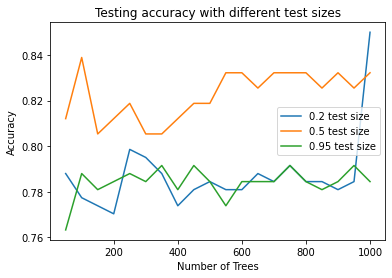

In [143]:
plt.clf()
plt.title("Testing accuracy with different test sizes")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(list(entropy_test.keys()),list(entropy_test.values()))  
plt.plot(list(entropy_test2.keys()),list(entropy_test2.values()))  
plt.plot(list(entropy_test3.keys()),list(entropy_test3.values()))  
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])

In [145]:
trainData,testData,trainLabel,testLabel = train_test_split(X_scaled,y,test_size=0.5)
net_train2, net_test2 = [],[]
keys = [3,7,13,21]

clf_1_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_1_1.fit(trainData,trainLabel)
train = clf_1_1.score(trainData,trainLabel)
test = clf_1_1.score(testData,testLabel)
net_train2.append(train)
net_test2.append(test)
print("Training Accuracy:", train)
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%test)

clf_2_1 = MLPClassifier(hidden_layer_sizes=(7), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_2_1.fit(trainData,trainLabel)
train = clf_2_1.score(trainData,trainLabel)
test = clf_2_1.score(testData,testLabel)
net_train2.append(train)
net_test2.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%test)


clf_3_1 = MLPClassifier(hidden_layer_sizes=(13), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_3_1.fit(trainData,trainLabel)
train = clf_3_1.score(trainData,trainLabel)
test = clf_3_1.score(testData,testLabel)
net_train2.append(train)
net_test2.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%test)

clf_4_1 = MLPClassifier(hidden_layer_sizes=(21), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_4_1.fit(trainData,trainLabel)
train = clf_4_1.score(trainData,trainLabel)
test = clf_4_1.score(testData,testLabel)
net_train2.append(train)
net_test2.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%test)

Training Accuracy: 0.9594594594594594
Accuracy of using 3 neurons in the hidden layer:0.7584

Training Accuracy: 1.0
Accuracy of using 7 neurons in the hidden layer:0.7517

Training Accuracy: 1.0
Accuracy of using 13 neurons in the hidden layer:0.7517

Training Accuracy: 1.0
Accuracy of using 21 neurons in the hidden layer:0.7383


In [146]:
trainData,testData,trainLabel,testLabel = train_test_split(X_scaled,y,test_size=0.95)
net_train3, net_test3 = [],[]
keys = [3,7,13,21]

clf_1_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_1_1.fit(trainData,trainLabel)
train = clf_1_1.score(trainData,trainLabel)
test = clf_1_1.score(testData,testLabel)
net_train3.append(train)
net_test3.append(test)
print("Training Accuracy:", train)
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%test)

clf_2_1 = MLPClassifier(hidden_layer_sizes=(7), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_2_1.fit(trainData,trainLabel)
train = clf_2_1.score(trainData,trainLabel)
test = clf_2_1.score(testData,testLabel)
net_train3.append(train)
net_test3.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%test)


clf_3_1 = MLPClassifier(hidden_layer_sizes=(13), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_3_1.fit(trainData,trainLabel)
train = clf_3_1.score(trainData,trainLabel)
test = clf_3_1.score(testData,testLabel)
net_train3.append(train)
net_test3.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%test)

clf_4_1 = MLPClassifier(hidden_layer_sizes=(21), max_iter=20000, alpha=1e-4,solver='adam', learning_rate_init=.01)
clf_4_1.fit(trainData,trainLabel)
train = clf_4_1.score(trainData,trainLabel)
test = clf_4_1.score(testData,testLabel)
net_train3.append(train)
net_test3.append(test)
print("\nTraining Accuracy:", train)
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%test)

Training Accuracy: 1.0
Accuracy of using 3 neurons in the hidden layer:0.7880

Training Accuracy: 1.0
Accuracy of using 7 neurons in the hidden layer:0.7880

Training Accuracy: 1.0
Accuracy of using 13 neurons in the hidden layer:0.7915

Training Accuracy: 1.0
Accuracy of using 21 neurons in the hidden layer:0.7809


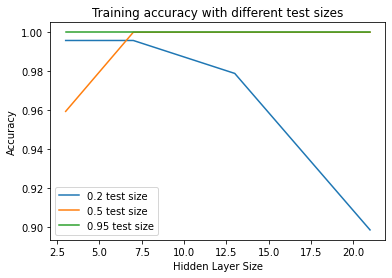

In [149]:
plt.clf()
plt.title("Training accuracy with different test sizes")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.plot(keys,net_train)  
plt.plot(keys,net_train2)  
plt.plot(keys,net_train3)  
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])

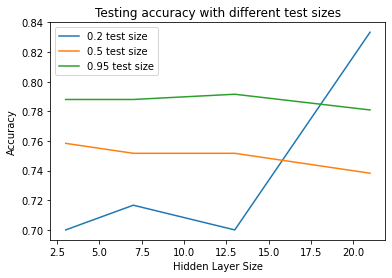

In [148]:
plt.clf()
plt.title("Testing accuracy with different test sizes")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.plot(keys,net_test)  
plt.plot(keys,net_test2)  
plt.plot(keys,net_test3)  
plt.legend(["0.2 test size","0.5 test size","0.95 test size"])